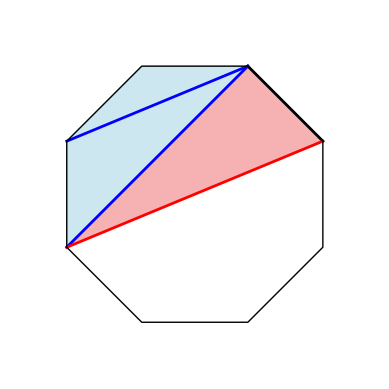

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as PolygonPatch
import matplotlib.animation as animation
import numpy as np

# Define octagon vertices
def regular_polygon(n, radius=1, rotation=0):
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False) + rotation
    return np.column_stack((radius * np.cos(angles), radius * np.sin(angles)))

# Create octagon
octagon = regular_polygon(8, radius=1.5, rotation=np.pi/8)

# Choose vertices to form triangles
v0 = octagon[0]
v1 = octagon[1]  # neighbor of v0 — forms black edge
v2 = octagon[4]  # non-neighbor — forms first triangle
v3 = octagon[3]  # vertex for second blue line (above the first blue line)
v4 = octagon[2]  # additional vertex for the second triangle

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.axis('off')

# Artists
black_line, = ax.plot([], [], 'k-', lw=2)
blue_line1, = ax.plot([], [], 'b-', lw=2)
blue_line2, = ax.plot([], [], 'b-', lw=2)
red_line, = ax.plot([], [], 'r-', lw=2)

# Create triangle patches
# First triangle (red)
triangle1_patch = plt.Polygon([v0, v1, v2], closed=True, color='lightcoral', alpha=0.6)
# Second triangle (blue) - formed by the new blue line and octagon boundaries
triangle2_patch = plt.Polygon([v1, v3, v4], closed=True, color='lightblue', alpha=0.6)
# Third triangle (blue) - formed by the new blue line and octagon boundaries
triangle3_patch = plt.Polygon([v1, v2, v3], closed=True, color='lightblue', alpha=0.6)

# Initially invisible
triangle1_patch.set_visible(False)
triangle2_patch.set_visible(False)
triangle3_patch.set_visible(False)

# Add patches to the plot
ax.add_patch(triangle1_patch)
ax.add_patch(triangle2_patch)
ax.add_patch(triangle3_patch)

# Draw octagon
ax.plot(*np.append(octagon, [octagon[0]], axis=0).T, 'k-', lw=1)

# Animation update
def update(frame):
    if frame == 0:
        # First frame: Show only the black edge
        black_line.set_data([v0[0], v1[0]], [v0[1], v1[1]])
        blue_line1.set_data([], [])
        blue_line2.set_data([], [])
        red_line.set_data([], [])
        triangle1_patch.set_visible(False)
        triangle2_patch.set_visible(False)
        triangle3_patch.set_visible(False)
    elif frame == 1:
        # Second frame: Add first blue line
        blue_line1.set_data([v1[0], v2[0]], [v1[1], v2[1]])
        blue_line2.set_data([], [])
        red_line.set_data([], [])
        triangle1_patch.set_visible(False)
        triangle2_patch.set_visible(False)
        triangle3_patch.set_visible(False)

    elif frame == 2:
        # Third frame: Add red line
        red_line.set_data([v2[0], v0[0]], [v2[1], v0[1]])
        blue_line2.set_data([], [])
        triangle1_patch.set_visible(False)
        triangle2_patch.set_visible(False)
        triangle3_patch.set_visible(False)

    elif frame == 3:
        # Fourth frame: Shade the first triangle red
        triangle1_patch.set_visible(True)
        triangle2_patch.set_visible(False)
        triangle3_patch.set_visible(False)
        blue_line2.set_data([], [])
    elif frame == 4:
        # Fifth frame: Add second blue line (keep red triangle visible)
        blue_line2.set_data([v1[0], v3[0]], [v1[1], v3[1]])
        triangle1_patch.set_visible(True)  # Keep red triangle visible
        triangle2_patch.set_visible(False)
        triangle3_patch.set_visible(False)
    elif frame == 5:
        # Sixth frame: Shade the second triangle blue (keep red triangle visible)
        triangle1_patch.set_visible(True)  # Keep red triangle visible
        triangle2_patch.set_visible(True)  # Add blue triangle
        triangle3_patch.set_visible(True)
    
    return black_line, blue_line1, blue_line2, red_line, triangle1_patch, triangle2_patch

# Create animation with 6 frames
ani = animation.FuncAnimation(fig, update, frames=6, interval=1000, blit=True)

# Save the animation as a GIF file
ani.save('octagon_triangles_animation.gif', writer='pillow', fps=1)

# Also display the animation in the notebook
from IPython.display import HTML
HTML(ani.to_jshtml())
